<a href="https://colab.research.google.com/github/Amr-187/AI-ML-Bootcamp/blob/main/MNIST_Amrina_Rahman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import gc
import cv2

In [10]:
df_train=pd.read_csv('/content/drive/MyDrive/AI & ML Bootcamp 2024/Class 4_SVM/MNIST_train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/AI & ML Bootcamp 2024/Class 4_SVM/MNIST_test.csv')

In [11]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df_train.dtypes

,0
label,int64
pixel0,int64
pixel1,int64
pixel2,int64
pixel3,int64
...,...
pixel779,int64
pixel780,int64
pixel781,int64
pixel782,int64


<Axes: >

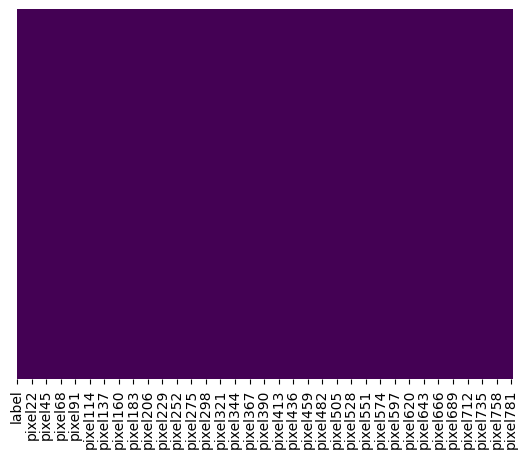

In [15]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df_train.value_counts()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  pixel73  pixel74  pixel75  pixel76  pixel77  pixel78  pixel79  pixel80  pixel81  pixel82  pixel83  pixel84  pixel85  pixel86  pixel87  pixel88  pixel89  pixel90  pixel91  pixel92  pixel93  pixel94  pixel95  pixel96  pixel97  pixel98  pixel99  pixel100  pixel101  pixel102  pixel103  pixel104  pixel105  pixel106  pixel107  pixel108  pixel109  pixel110  pixel111  pixel112  pixel113  pixel114  pixel115  pixel116  pixel117  pixel118  pixel119  pixel120  pixel121  pixel122  pixel123  pixel124  pixel125  pixel126  pixel127  pixel128  pixel129  pixel130  pixel131  pixel132  pixel133  pixel134  pixel135  pixel136  pixel137  pixel138  pixel139  pixel140  pixel141  pixel142  pixel143  pixel144  pixel145  pixel146  pixel147  pixel148  pixel149  pixel150  pixel151  pixel152  pixel153  pixel154  pixel155  pixel156  pixel157  pixel158  pixel159  pixel160  pixel161  pixel162  pixel163  pixel164  pixel165  pixel166  pixel167  pixel168  pixel169  pixel170  pixel171  pixel172  pixel173  pixel174  pixel175  pixel176  pixel177  pixel178  pixel179  pixel180  pixel181  pixel182  pixel183  pixel184  pixel185  pixel186  pixel187  pixel188  pixel189  pixel190  pixel191  pixel192  pixel193  pixel194  pixel195  pixel196  pixel197  pixel198  pixel199  pixel200  pixel201  pixel202  pixel203  pixel204  pixel205  pixel206  pixel207  pixel208  pixel209  pixel210  pixel211  pixel212  pixel213  pixel214  pixel215  pixel216  pixel217  pixel218  pixel219  pixel220  pixel221  pixel222  pixel223  pixel224  pixel225  pixel226  pixel227  pixel228  pixel229  pixel230  pixel231  pixel232  pixel233  pixel234  pixel235  pixel236  pixel237  pixel238  pixel239  pixel240  pixel241  pixel242  pixel243  pixel244  pixel245  pixel246  pixel247  pixel248  pixel249  pixel250  pixel251  pixel252  pixel253  pixel254  pixel255  pixel256  pixel257  pixel258  pixel259  pixel260  pixel261  pixel262  pixel263  pixel264  pixel265  pixel266  pixel267  pixel268  pixel269  pixel270  pixel271  pixel272  pixel273  pixel274  pixel275  pixel276  pixel277  pixel278  pixel279  pixel280  pixel281  pixel282  pixel283  pixel284  pixel285  pixel286  pixel287  pixel288  pixel289  pixel290  pixel291  pixel292  pixel293  pixel294  pixel295  pixel296  pixel297  pixel298  pixel299  pixel300  pixel301  pixel302  pixel303  pixel304  pixel305  pixel306  pixel307  pixel308  pixel309  pixel310  pixel311  pixel312  pixel313  pixel314  pixel315  pixel316  pixel317  pixel318  pixel319  pixel320  pixel321  pixel322  pixel323  pixel324  pixel325  pixel326  pixel327  pixel328  pixel329  pixel330  pixel331  pixel332  pixel333  pixel334  pixel335  pixel336  pixel337  pixel338  pixel339  pixel340  pixel341  pixel342  pixel343  pixel344  pixel345  pixel346  pixel347  pixel348  pixel349  pixel350  pixel351  pixel352  pixel353  pixel354  pixel355  pixel356  pixel357  pixel358  pixel359  pixel360  pixel361  pixel362  pixel363  pixel364  pixel365  pixel366  pixel367  pixel368  pixel369  pixel370  pixel371  pixel372  pixel373  pixel374  pixel375  pixel376  pixel377  pixel378  pixel379  pixel380  pixel381  pixel382  pixel383  pixel384  pixel385  pixel386  pixel387  pixel388  pixel389  pixel390  pixel391  pixel392  pixel393  pixel394  pixel395  pixel396  pixel397  pixel398  pixel399  pixel400  pixel401  pixel402  pixel403  pixel404  pixel405  pixel406  pixel407  pixel408  pixel409  pix

In [17]:
X=df_train.drop('label',axis=1)
y=df_train['label']

In [21]:
print(X[:10])
print(y[:10])

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
X_train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
std_scaler=StandardScaler()
X_train=std_scaler.fit_transform(X_train)
X_test=std_scaler.transform(X_test)

In [24]:
X_train[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
model=SVC(kernel='rbf',random_state=101)
model.fit(X_train,y_train)

SVC(random_state=101)

In [27]:
y_pred=model.predict(X_test)

In [28]:
print(y_pred[:10])
print(y_test[:10])

[1 3 0 0 1 9 1 5 0 6]
20209    1
7136     3
17339    0
37117    0
22572    1
3652     9
31974    1
39025    5
14668    0
14004    6
Name: label, dtype: int64


In [29]:
comparison=pd.DataFrame({'Actual Outcome': y_test,'Predicted Outcome': y_pred})
comparison

,Actual Outcome,Predicted Outcome
20209,1,1
7136,3,3
17339,0,0
37117,0,0
22572,1,1
...,...,...
15824,5,5
38252,3,3
24309,9,9
37222,3,3


<function confusion_matrix at 0x7bead575e5f0>


<Axes: >

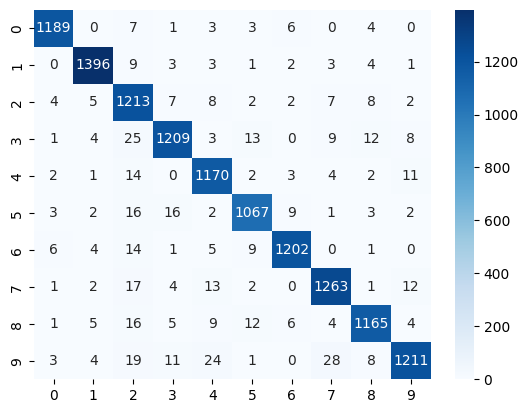

In [36]:
confusion_matrix(y_test,y_pred)
print(confusion_matrix)

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap="Blues")

In [31]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy",accuracy)

Accuracy 0.9591269841269842


In [43]:
X_set, y_set = X_train, y_train
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min()-1,stop=X_test[:,1].max()+1,step=0.01))

plt.contourf(X1,X2,model.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('blue','purple')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
              c=ListedColormap(('red','green'))(i),label=j)

plt.title('SVM Classifier (Training Set)')
plt.xlabel('Features')
plt.ylabel('Label')
plt.legend()
plt.show()


ValueError: X has 2 features, but SVC is expecting 784 features as input.

In [47]:
digits=pd.read_csv('/content/drive/MyDrive/AI & ML Bootcamp 2024/Class 4_SVM/MNIST_train.csv')
digits

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [50]:
zero=digits.iloc[1,1:]
zero.shape

(784,)

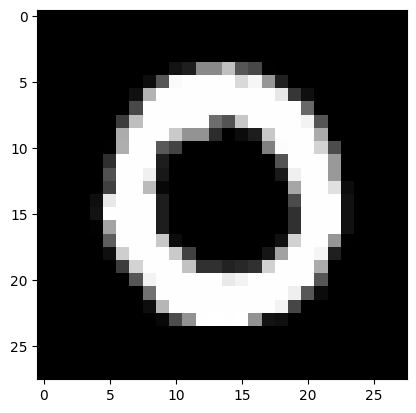

In [51]:
zero=zero.values.reshape(28,28)
plt.imshow(zero,cmap='gray')
plt.show()